#02 Trabalho em Grupo - Perceptron - Hélio Pio Correia Lima Júnior

### INTEGRANTES DA EQUIPE: LEONARDO MELO COSTA DA SILVA, MILENA DE CARVALHO CORDEIRO



Implemente um Perceptron simples para criar um classificador da função AND em Python. Utilize preferencialmente o Colab. O objetivo é separar totalmente as classes 0 e 1.

. Apresente graficamente o classificador no estado inicial (atribuição inicial dos pesos)

. Apresente graficamente o classificador no estado final (pós treinamento)

. Destaque a acurácia final


In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [399]:
from sklearn.metrics import accuracy_score

class Perceptron:
  def __init__(self, taxa_aprendizado=0.1, num_iteracoes=10, pesos=None, vies=None, acuracia_parada=1.):
    # Iniciando parametros
    self.taxa_aprendizado = taxa_aprendizado
    self.num_iteracoes = num_iteracoes
    self.pesos = pesos
    self.vies = vies
    self.funcao_ativacao = self._funcao_degrau
    self.acuracia_parada = acuracia_parada


  def fit(self, X, y): # Método de treinamento do perceptron
    self.X = X
    self.y = y
    num_colunas = X.shape[1] # obtendo o número de atributos
    y_previsto = np.zeros(len(y)) # iniciando o y_previsto para não ter lixo

    # Plotando os pesos iniciais
    print("Iniciando o treinamento \n")
    print('Pesos iniciais:')
    self.plot_decision_boundary(X, y, x_label='x1', y_label='x2', titulo=f"Início - P:{self.pesos} - V:{self.vies}")

    for epoca in range(1, self.num_iteracoes + 1): # épocas
      print(f"\n\n...::: Época: {epoca} :::...\n")
      ultimos_pesos = self.pesos
      ultimo_vies = self.vies
      for idx, x_i in enumerate(X): # Entradas
        print(f"\n{x_i}")
        saida_linear = 0

        for idx2, x_i2 in enumerate(x_i): # Cada Entrada (X1 e X2)
          # Saida_linear é soma dos produtos dos pesos pelas entradas com a adição do bias(viés)
          saida_linear += x_i2 * self.pesos[idx2]
          print(f"saida_linear do X{idx2}: {saida_linear}")

        saida_linear += self.vies
        print(f"saida_linear após bias: {saida_linear} \n")

        # Aplicação da não linearidade atráves da função de ativação
        y_previsto[idx] = self.funcao_ativacao(saida_linear).astype(int)
        y_previsto = y_previsto.astype(int)
        print(f"y esperado: {y[idx]}")
        print(f"y previsto: {y_previsto[idx]}")
        # Guarda o estado anterior ao Backpropagation, ou seja, os valores dos pesos e bies da época anterior para exibição no gráfico
        ultimos_pesos = self.pesos
        ultimo_vies = self.vies
        incremento = self.taxa_aprendizado * (y[idx] - y_previsto[idx])
        self.pesos += incremento * x_i
        self.vies += incremento

      # Cálculo da acurácia com os valores esperados x preditos
      acuracia = accuracy_score(y, y_previsto)
      print(f"Acurácia - Época {epoca}: {acuracia} - Pesos: {ultimos_pesos} - Viés: {ultimo_vies}")
      # Plotando resultados com os parâmetros usados na época
      self.plot_decision_boundary(X, y, x_label='x1', y_label='x2', titulo=f"Época {epoca} - P:{ultimos_pesos} - V:{ultimo_vies}", subtitulo=f"acurácia: {acuracia}")


      # Ao atingir a acuracia esperada, o treinamento é parado, mesmo que ainda restem épocas de treinamento
      if acuracia >= self.acuracia_parada:
        print(3*"\n")
        print(f"...::: Parada antecipada :::...\n y esperado: {y}, y previsto: {y_previsto} - Pesos: {self.pesos} - Acurácia: {acuracia} \n\n")
        return


    print(f"y esperado: {y}, y previsto: {y_previsto} - Pesos: {self.pesos} \n\n")


  def predict(self, X): # Método de predição do perceptron que utiliza os pesos e vies obtidos no treinamento
    saida_linear = np.dot(X, self.pesos) + self.vies
    y_previsto = self.funcao_ativacao(saida_linear)
    return y_previsto

  def _funcao_degrau(self, X): # Função de ativação degrau
    return np.where(X >= 0, 1, 0)

  def plot_decision_boundary(self, X, y, x_label='x1', y_label='x2', titulo='', subtitulo=''):
    X_color = X
    y_color = np.vectorize(lambda r: 'red' if r == 0 else 'blue')(y)
    x_axis, y_axis = np.arange(-.5, 1.5, .005), np.arange(-.5, 1.5, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = self.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color[:, 0], X_color[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel= x_label,
        ylabel= y_label,
        title=str(self.__class__.__name__) + " - " + titulo
        )

In [400]:
# Valores da base de treino X para o classificador AND
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Valores da base de treino Y (Target) para o classificador AND
y = np.array([0, 0, 0, 1])

In [401]:
# Instanciando classe do Perceptron e inicializando parâmetros de treinamento
p = Perceptron(taxa_aprendizado=0.1, num_iteracoes=10, pesos=[0.5, 0.6], vies=-0.3)

Iniciando o treinamento 

Pesos iniciais:


...::: Época: 1 :::...


[0 0]
saida_linear do X0: 0.0
saida_linear do X1: 0.0
saida_linear após bias: -0.3 

y esperado: 0
y previsto: 0

[0 1]
saida_linear do X0: 0.0
saida_linear do X1: 0.6
saida_linear após bias: 0.3 

y esperado: 0
y previsto: 1

[1 0]
saida_linear do X0: 0.5
saida_linear do X1: 0.5
saida_linear após bias: 0.09999999999999998 

y esperado: 0
y previsto: 1

[1 1]
saida_linear do X0: 0.4
saida_linear do X1: 0.9
saida_linear após bias: 0.4 

y esperado: 1
y previsto: 1
Acurácia - Época 1: 0.5 - Pesos: [0.4 0.5] - Viés: -0.5


...::: Época: 2 :::...


[0 0]
saida_linear do X0: 0.0
saida_linear do X1: 0.0
saida_linear após bias: -0.5 

y esperado: 0
y previsto: 0

[0 1]
saida_linear do X0: 0.0
saida_linear do X1: 0.5
saida_linear após bias: 0.0 

y esperado: 0
y previsto: 1

[1 0]
saida_linear do X0: 0.4
saida_linear do X1: 0.4
saida_linear após bias: -0.19999999999999996 

y esperado: 0
y previsto: 0

[1 1]
saida_linear do X

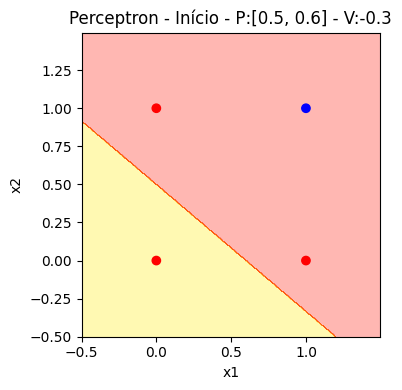

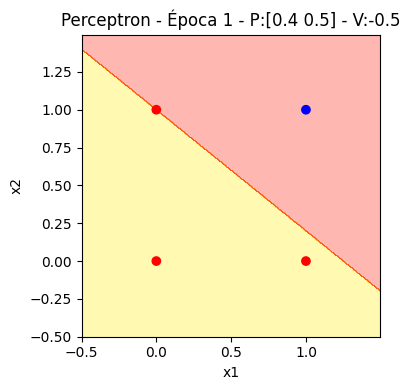

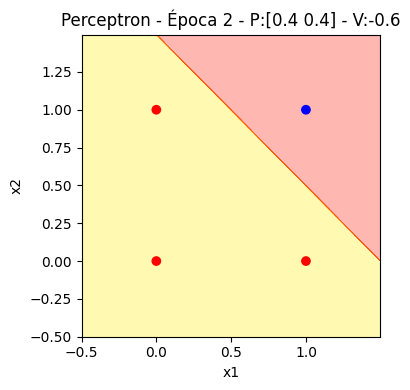

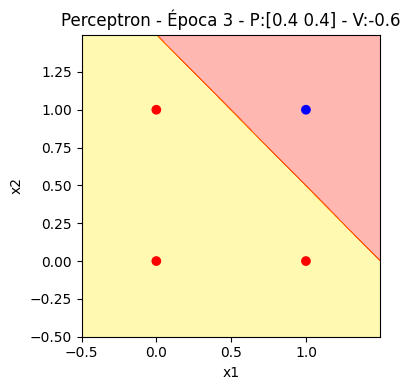

In [402]:
# Iniciando o treinamento do Perceptron
p.fit(X, y)